# Inference

### Every time we draw a random sample and perform an inferencial (or even bayesian) test, we cannot explicitly confirm that our null or alternative hypothesis is correct. The most we can say is that there is a probability that this sample reflects in some way the population.

### We reviewed las week our first type of inference that was when we new the mean and variance from the population and we wanted to infer the relationship between a random variable and the population.

### Now we will take a quick overview of some parametric test statistics used to compared distributions

### Let's explore the question what is a p-value?

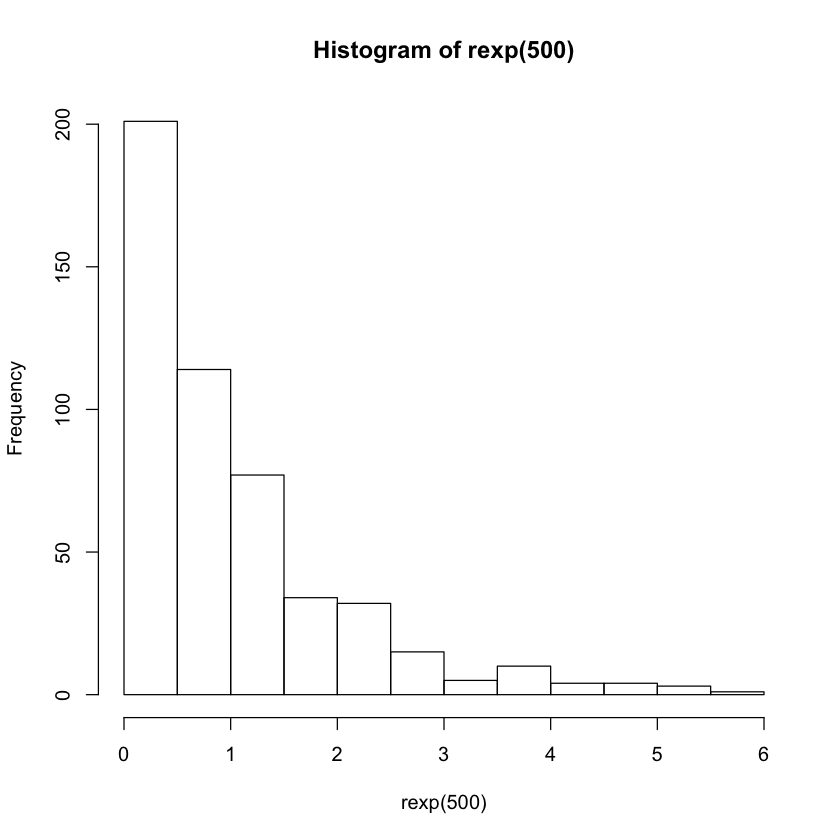

In [1]:
hist(rexp(500))

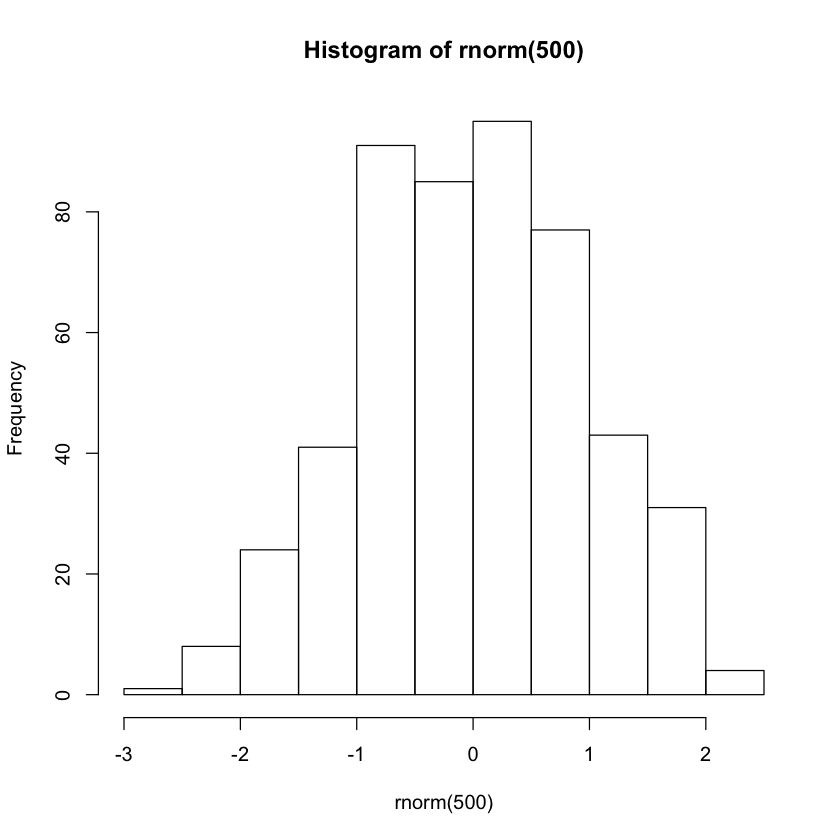

In [2]:
hist(rnorm(500))

In [1]:
eq = replicate(10000, t.test(rnorm(50),rnorm(50))$p.value)##what do we expect??
no_eq = replicate(10000, t.test(runif(50),rnorm(50))$p.value)##what do we expect??

In [2]:
mean(no_eq)
mean(eq)

[1] 0.01781346

[1] 0.5000313

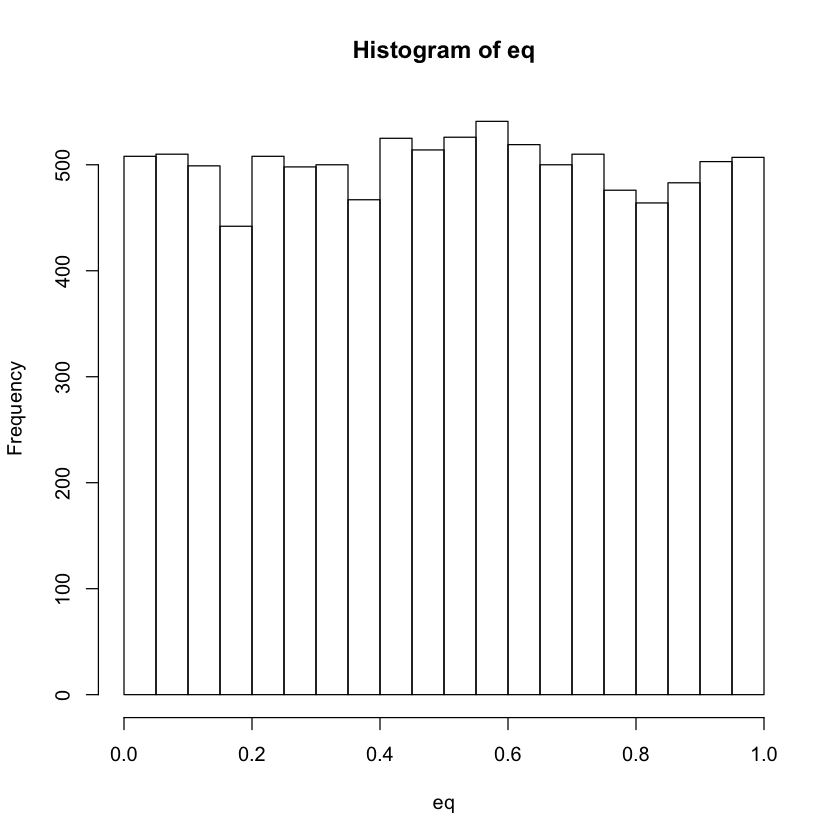

In [3]:
hist(eq,breaks =25) ###What kind of distribution is this??

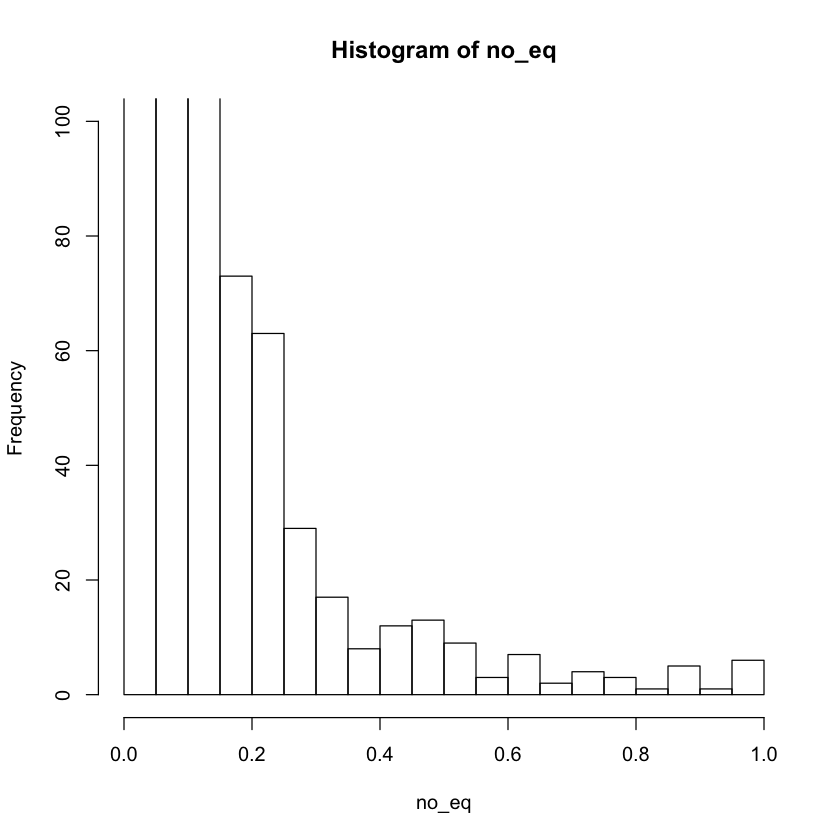

In [4]:
hist(no_eq,breaks =25, ylim = c(0,100))

Bottom line is... p-value does not prove your hypothesis regarding a theory, it simply gives a degree of confidence that allows you to analyse your DATA and act accordingly based on this confidence.

We shouls always do multiple replicates and evaluate the distribution of p-values.

## Now lets see inference statistics when we compare two samples.

### When can we use these tests?

- Compare the efficacy between two different drugs 
- Average time difference between two enzymes activation times
- Testing two production lines to see if their outputs are different
- Comparing test scores


## A. Two samples tests when Population Variances Are Equal

In [5]:
##A study was conducted to compare the weights of shepherd dogs and Bullmastiffs in pounds

A= c(175, 168, 168, 190, 156, 181, 182, 175, 174, 179)
B= c(185, 169, 173, 173, 188, 186, 175, 174, 179, 180)

mean(A) 
sd(A)
mean(B)
sd(B)

[1] 174.8

[1] 9.342852

[1] 178.2

[1] 6.442912

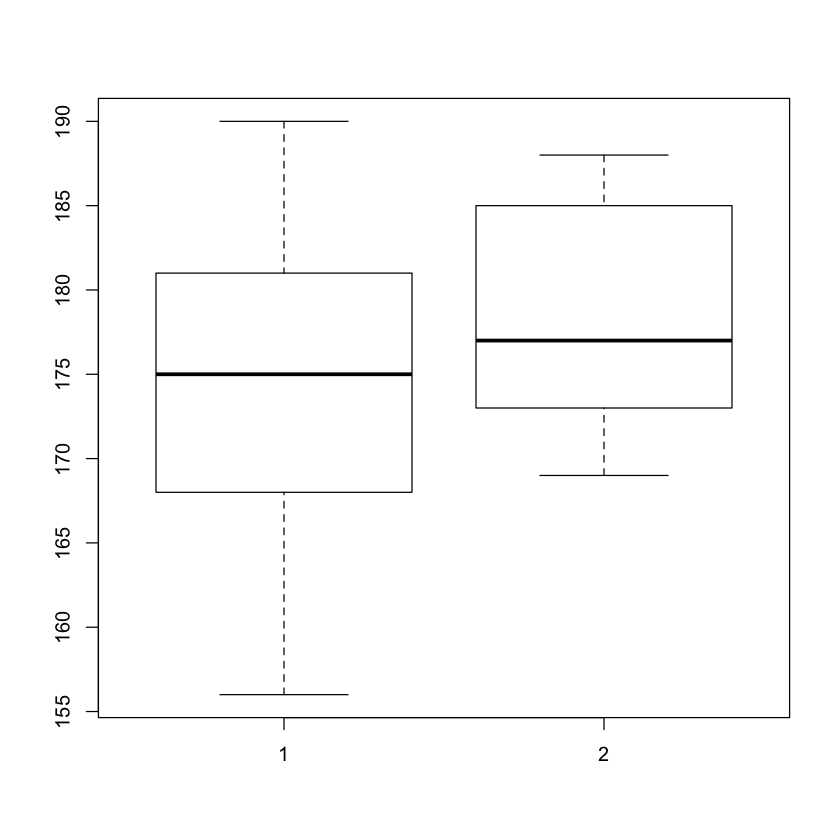

In [6]:
boxplot(A,B)

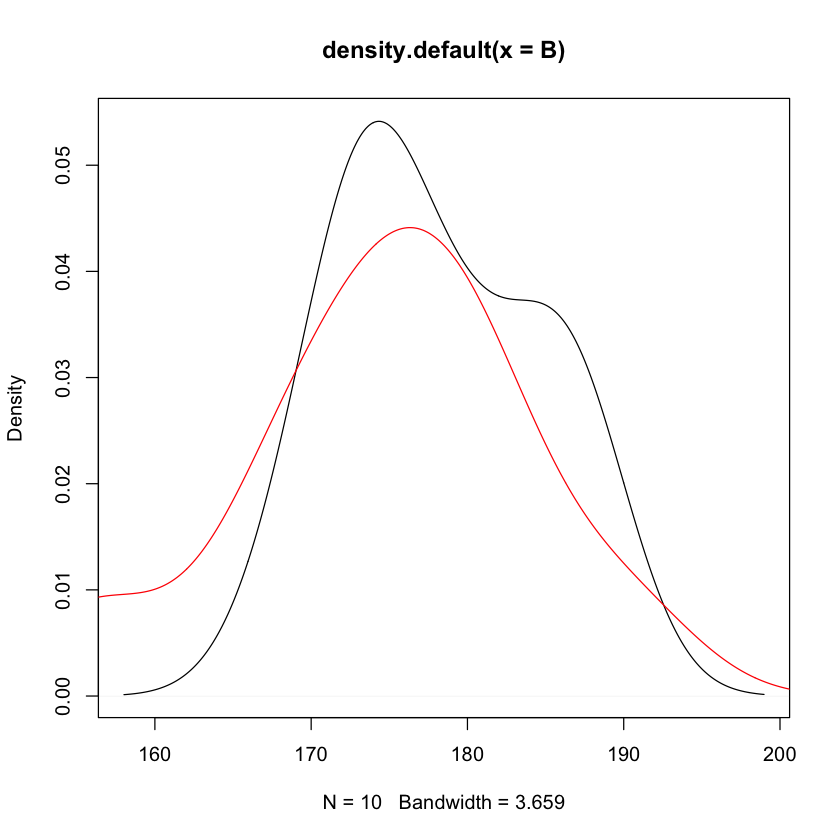

In [7]:
dA = density(A)
dB = density(B)
plot(dB)
lines(dA, col = "red")

### First, we need to determine if these samples share the same variances (remember homoskedasticity ?). For this we are going to use a fisher's F test.

In [12]:
var.test(A,B)


	F test to compare two variances

data:  A and B
F = 2.1028, num df = 9, denom df = 9, p-value = 0.2834
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.5223017 8.4657950
sample estimates:
ratio of variances 
          2.102784 


In [13]:
qf(0.95, 9, 9) ###This would be the critical value for the F distribution comparing variances of the two samples

[1] 3.178893

### Lets run the two sample t-test

In [14]:
t.test(A,B, var.equal=TRUE, paired=FALSE)


	Two Sample t-test

data:  A and B
t = -0.94737, df = 18, p-value = 0.356
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10.93994   4.13994
sample estimates:
mean of x mean of y 
    174.8     178.2 


In [15]:
qt(0.975, 18) ##critical value

[1] 2.100922

### Lets look at the statistic

$$H_0: \mu_X = \mu_Y \mbox{ vs. } H_1: \mu_X \neq \mu_Y$$


$$T=\frac{\bar X - \bar Y -(\mu_X -\mu_Y)}{S_p\sqrt{1/n + 1/m}} \sim t_{n+m-2}.$$


Reject $H_0$ if $|T| > t_{\alpha/2,n+m-2}$.

follows a $t_{n+m−2}$ distribution where $S_p^2$, the pooled sample variance:

$$S_p^2 = \frac{(n-1)S_X^2 + (m-1)S_Y^2}{n+m-2}.$$

---

## B. Two samples tests when Population Variances Are unequal

$$\sigma_{x}^2 \neq \sigma_{y}^2 $$

We can use the t statistic

$$T=\frac{\bar X - \bar Y -(\mu_X -\mu_Y)}{\sqrt{\frac{S_{x}^2}{n} + \frac{S_{y}^2}{m}}} $$

#### follows, at least approximately, a tr distribution where r, the adjusted degrees of freedom is determined by the equation:

$$ r = \frac{\big({\frac{S_{x}^2}{n} + \frac{S_{y}^2}{m}}\big)^2}{\frac{(\frac{S_{x}^2}{n})^2}{n-1}+\frac{(\frac{S_{y}^2}{m})^2}{m-1}}$$


In [16]:
t.test(A,B, var.equal=FALSE, paired=FALSE)


	Welch Two Sample t-test

data:  A and B
t = -0.94737, df = 15.981, p-value = 0.3576
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.008795   4.208795
sample estimates:
mean of x mean of y 
    174.8     178.2 


### Example 2: [https://onlinecourses.science.psu.edu/stat414/node/275](https://onlinecourses.science.psu.edu/stat414/node/275)
A psychologist was interested in exploring whether or not male and female college students have different driving behaviors. There were a number of ways that she could quantify driving behaviors. She opted to focus on the fastest speed ever driven by an individual. Therefore, the particular statistical question she framed was as follows:

          Is the mean fastest speed driven by male college students different than the mean fastest speed driven by female college students?
          

She conducted a survey of a random n = 34 male college students and a random m = 29 female college students. Here is a descriptive summary of the results of her survey

![title](t_test.png)

t= 3.56

r = 55.5

#### Critical value is:
t(0.025,55) = 2.004

#### P value is 
2×P($T_{55}$>3.54)

=2(0.0004)

=0.0008

In [17]:
2*pt(3.56,55, lower = F) ##P value

[1] 0.0007735915

## C. Paired Samples

In this case we will compare two dependent samples:

This case applies to cases where we obtain data from the same samples at different time points, or different tests applied to the same subjects.



### To remove the dependence between the two samples by substracting each set of measurements
$$D_i=X_i−Y_i$$

$$T=\frac{\bar{d} - \mu_0}{\frac{S_d}{\sqrt{n}}} $$ 

t-distribution with n−1 degrees of freedom

### Example:

A school athletics has taken a new instructor, and want to test the effectiveness of the new type of training proposed by comparing the average times of 10 runners in the 100 meters. Are below the time in seconds before and after training for each athlete.

In [18]:
Before_training= c( 12.9, 13.5, 12.8, 15.6, 17.2, 19.2, 12.6, 15.3, 14.4, 11.3)
After_training = c(12.0, 12.2, 11.2, 13.0, 15.0, 15.8, 12.2, 13.4, 12.9, 11.0)

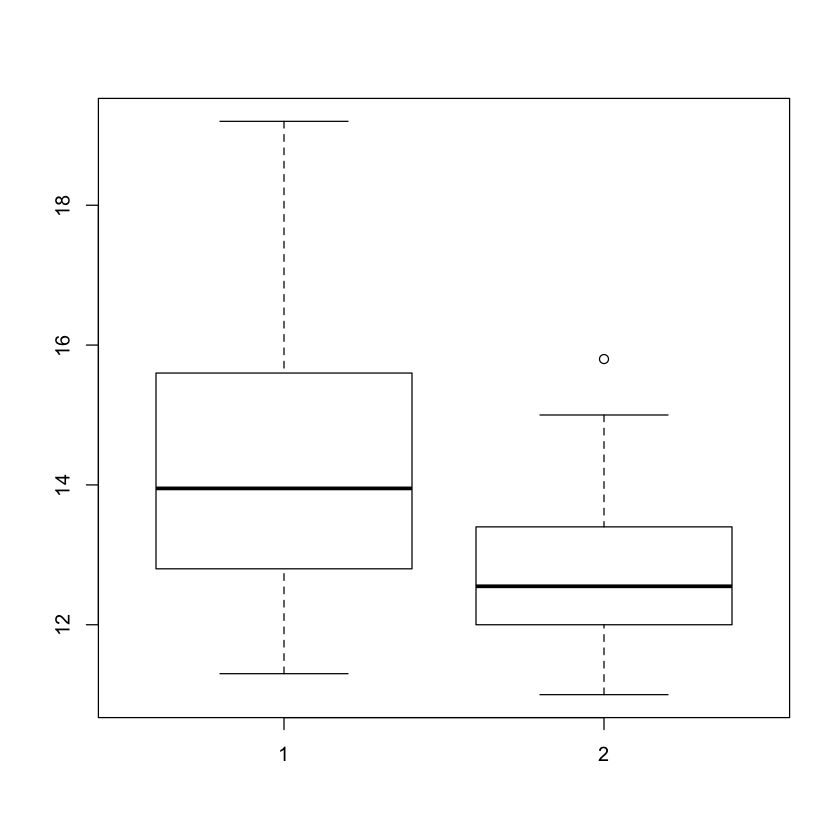

In [19]:
boxplot(Before_training,After_training)

In [20]:
t.test(Before_training,After_training, paired=TRUE)


	Paired t-test

data:  Before_training and After_training
t = 5.2671, df = 9, p-value = 0.0005158
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.9185294 2.3014706
sample estimates:
mean of the differences 
                   1.61 


# Whenever we conduct a hypothesis test, we'd like to make sure that it is a test of high quality. 

To this end, power analysis help us to calculate the probability that the test is of high power. Unfortunately for the sake of time, we wont be reviewing in detail power analysis.

Power analysis allows us to evaluate the probability of rejecting the null hypothesis H0 when the alternative hypothesis HA is the hypothesis that is true

![title](power.png)

Using the power analysis we can also determine the sample size (n) necessary to ensure that the hypothesis test we are conducting has high power. 

## Important: review the following vignette from the package pwd, which is specialized in calculating power analysis for multiple tests.

#### Particularly look at 

[https://cran.r-project.org/web/packages/pwr/vignettes/pwr-vignette.html](https://cran.r-project.org/web/packages/pwr/vignettes/pwr-vignette.html)

In [9]:
install.packages("pwr")


The downloaded binary packages are in
	/var/folders/4w/71fy66cs0fg7gh1mvdp8x8540000gn/T//RtmpaKQ6sl/downloaded_packages


In [10]:
library(pwr)
cohen.ES(test = "t", size = "medium") ##where t is the t test and medium is the effect size that we want to calculate


#effect size as “the degree to which the null hypothesis is false


Warning message:
“package ‘pwr’ was built under R version 3.4.3”


     Conventional effect size from Cohen (1982) 

           test = t
           size = medium
    effect.size = 0.5


## Effect size can be defined as the degree to which the null hypothesis is false

In [11]:
pwr.t.test(n = 10, d = 0.5, sig.level = 0.05)


     Two-sample t test power calculation 

              n = 10
              d = 0.5
      sig.level = 0.05
          power = 0.1850957
    alternative = two.sided

NOTE: n is number in *each* group


In [133]:
pwr.t.test(d = 0.5, power = 0.80, sig.level = 0.05) 
##For a desired power of 80%, Type I error tolerance of 0.05, 
##and a hypothesized effect size of 0.5, we should sample at least 64 per group.


     Two-sample t test power calculation 

              n = 63.76561
              d = 0.5
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


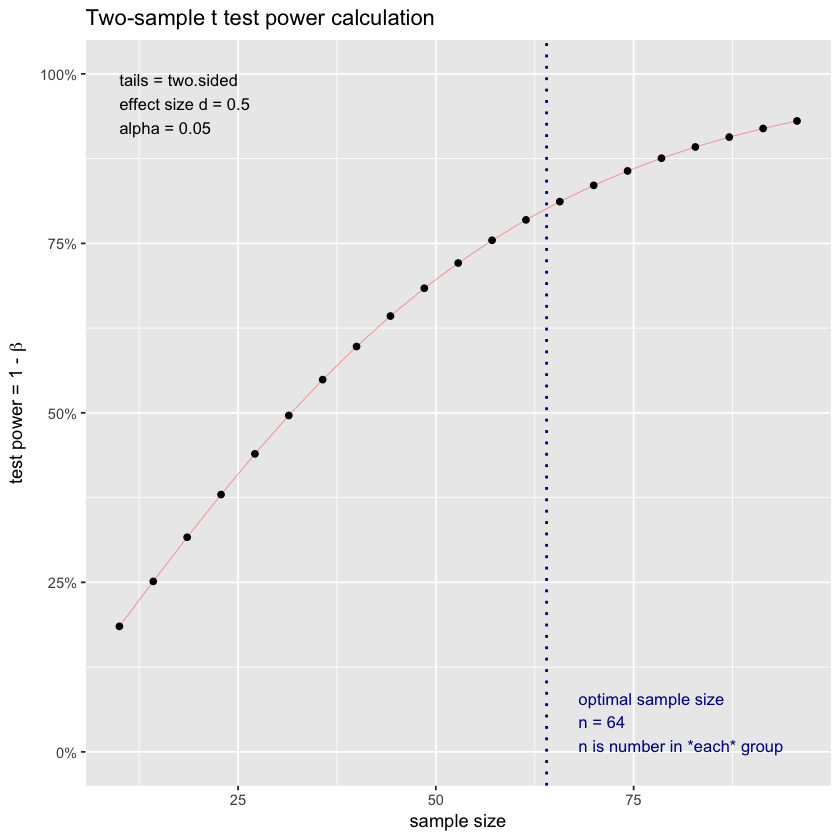

In [137]:
t.out <- pwr.t.test(d=0.5,
                    sig.level = 0.05, 
                    power = 0.80, alternative = "two.sided")
plot(t.out)

In [136]:
?pwr.t.test()